In [4]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#import seaborn as sns
#import altair as alt

#alt.renderers.enable('notebook')
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [5]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

In [63]:
protein_check = 'PTEN'
phosProt = phos.filter(regex=protein_check)
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[loc, gene]].dropna(axis=0)
        oneSitedf_wt = wt[[loc, gene]].dropna(axis=0)
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        print("Results for " + loc)
        print(ttest)



0.0125
Results for PTEN-S467
Ttest_indResult(statistic=0.1988775346087565, pvalue=0.8428279682684179)
Results for PTEN-S558
Ttest_indResult(statistic=-1.4855618668050925, pvalue=0.14176062835390138)
Results for PTEN-T556
Ttest_indResult(statistic=-1.3565706740507137, pvalue=0.17953994968192138)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

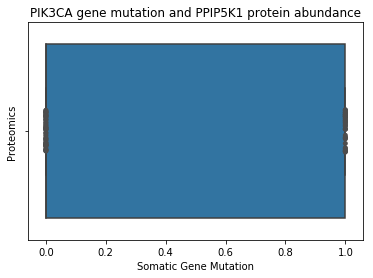

In [12]:
somatic_boxplot = sns.boxplot(data=cross, x=gene)
somatic_boxplot.set_title(gene + " gene mutation and " + protein_check + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

In [5]:
phosProt = phos.filter(regex='PDK')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)


0.05


In [9]:
phosProt = phos.filter(regex='IRS2')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

0.0038461538461538464
Results for IRS2-S1100
Ttest_indResult(statistic=-1.1228415172362924, pvalue=0.26551235764242587)
Results for IRS2-S365
Ttest_indResult(statistic=0.38985281829235874, pvalue=0.6975563462560624)
Results for IRS2-S388
Ttest_indResult(statistic=-0.6119418458313213, pvalue=0.5425588109981629)
Results for IRS2-S391
Ttest_indResult(statistic=-2.176253606263746, pvalue=0.03341833321656063)
Results for IRS2-S560
Ttest_indResult(statistic=-2.3097211799375055, pvalue=0.024755067981666396)
Results for IRS2-S577
Ttest_indResult(statistic=-0.9262059196071508, pvalue=0.35793035131055373)
Results for IRS2-S620
Ttest_indResult(statistic=-0.3642074443063041, pvalue=0.717270090953648)
Results for IRS2-S679
Ttest_indResult(statistic=0.6439070830781372, pvalue=0.5217703298207741)
Results for IRS2-S731
Ttest_indResult(statistic=-0.15079785621987576, pvalue=0.8806169797454081)
Results for IRS2-S736
Ttest_indResult(statistic=-0.5265066454392469, pvalue=0.6002749777969532)
Results for IR

[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

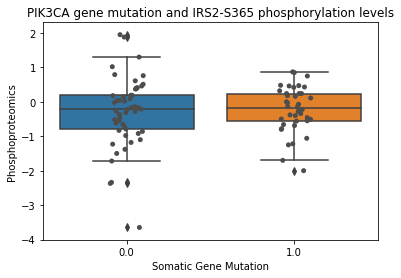

In [11]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[1])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[1] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[1],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

In [21]:
gene = 'PIK3CA'
sites = phos.filter(regex='IRS')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

#pcutoff = 0.05/len(cross.columns)
pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

Results for IRS1-S1005: 
Ttest_indResult(statistic=-0.9690977556578986, pvalue=0.3365203953002731)
Results for IRS1-S1100: 
Ttest_indResult(statistic=-2.144151151356816, pvalue=0.035056594434805)
Results for IRS1-S1101: 
Ttest_indResult(statistic=-2.098899731593709, pvalue=0.038979458432090074)
Results for IRS1-S1134: 
Ttest_indResult(statistic=-1.770797347381606, pvalue=0.08055195840145042)
Results for IRS1-S270: 
Ttest_indResult(statistic=-0.7860248714648148, pvalue=0.4337493578683552)
Results for IRS1-S312: 
Ttest_indResult(statistic=1.3429173455723695, pvalue=0.18561470344519224)
Results for IRS1-S323: 
Ttest_indResult(statistic=-0.5485686919133093, pvalue=0.5847228047850945)
Results for IRS1-S330: 
Ttest_indResult(statistic=-1.093938678842869, pvalue=0.27814694985592836)
Results for IRS1-S337: 
Ttest_indResult(statistic=0.4798182866151812, pvalue=0.6325746861136163)
Results for IRS1-S348: 
Ttest_indResult(statistic=-0.14935866809247728, pvalue=0.881733079425064)
Results for IRS1-S

[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

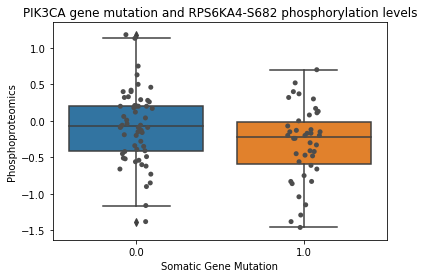

In [17]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[3])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[3] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[3],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

In [47]:
gene = 'PIK3CA'
print(phos)
sites = phos.filter(regex='RASGRP2')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]


pcutoff = 0.05/len(cross.columns)
print(pcutoff)

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        #print(mutsitedf)
        #print(len(mutsitedf))
        wtsitedf = wt[[gene, loc]].dropna()
        #print(wtsitedf)
        #print(len(wtsitedf))
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

idx   AAAS-S495  AAK1-S18  AAK1-S20  AAK1-S21  AAK1-S624  AAK1-S637  \
S001        NaN     -0.28      0.44      0.52      -0.70      -0.68   
S002        NaN     -0.53     -1.14      0.10      -0.66      -0.42   
S003      -0.29      0.42     -0.05     -0.06      -0.03       0.80   
S004       0.15       NaN     -0.54     -0.17       0.21      -0.17   
S005       0.60      0.64     -0.05     -0.08       0.14       0.63   
S006        NaN     -0.18     -0.52     -0.13       1.02       0.23   
S007       0.27     -0.46     -1.09     -1.58      -0.43      -0.49   
S008       0.50      0.42      0.38      0.31      -0.22       0.32   
S009      -0.20     -0.46     -0.18     -0.80       0.16       0.55   
S010       0.28      0.46      0.07       NaN       0.21       0.55   
S011      -0.08      0.28     -0.24     -0.79      -0.36      -1.27   
S012      -1.55      0.71      0.23       NaN      -0.20        NaN   
S013       0.61     -0.59     -0.42       NaN      -0.25      -0.32   
S014  

[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

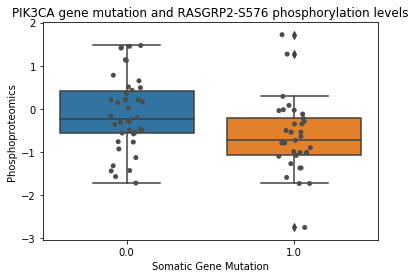

In [48]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[0])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[0] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[0],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

In [62]:
gene = 'PIK3CA'
#print(phos)
sites = phos.filter(regex='PTEN')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]


#pcutoff = 0.05/len(cross.columns)
#print(pcutoff)
pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        #print(mutsitedf)
        #print(len(mutsitedf))
        wtsitedf = wt[[gene, loc]].dropna()
        #print(wtsitedf)
        #print(len(wtsitedf))
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

Results for PTEN-S467: 
Ttest_indResult(statistic=0.1988775346087565, pvalue=0.8428279682684179)
Results for PTEN-S558: 
Ttest_indResult(statistic=-1.4855618668050925, pvalue=0.14176062835390138)
Results for PTEN-T556: 
Ttest_indResult(statistic=-1.3565706740507137, pvalue=0.17953994968192138)


In [68]:
gene = 'PIK3CA'
protList = ['BTK']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for BTK: 
Ttest_indResult(statistic=-2.03971425856399, pvalue=0.044069911371210434)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

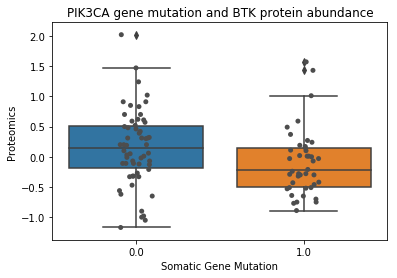

In [70]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

In [73]:
gene = 'PIK3CA'
#print(phos)
sites = phos.filter(regex='PIP2')
sigResults = [];

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]


#pcutoff = 0.05/len(cross.columns)
#print(pcutoff)
pcutoff = 1

for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        #print(mutsitedf)
        #print(len(mutsitedf))
        wtsitedf = wt[[gene, loc]].dropna()
        #print(wtsitedf)
        #print(len(wtsitedf))
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

In [75]:
gene = 'PIK3CA'
protList = ['BAX']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for BAX: 
Ttest_indResult(statistic=2.4183934744101427, pvalue=0.01743565224974825)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

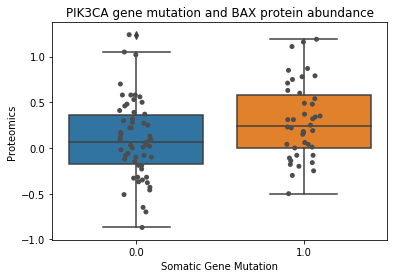

In [76]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

## Number of patients with PIK3CA mutations

In [11]:
pik3_mutation = somatic_mutations.loc[somatic_mutations['Gene'] == 'PIK3CA']

patients = pik3_mutation['Patient_Id']
patients = patients.unique()
print(len(patients))
print(patients)

49
['C3L-00006' 'C3L-00032' 'C3L-00139' 'C3L-00143' 'C3L-00156' 'C3L-00161'
 'C3L-00362' 'C3L-00563' 'C3L-00586' 'C3L-00601' 'C3L-00605' 'C3L-00769'
 'C3L-00770' 'C3L-00771' 'C3L-00781' 'C3L-00905' 'C3L-00918' 'C3L-00921'
 'C3L-00942' 'C3L-00947' 'C3L-00961' 'C3L-01247' 'C3L-01304' 'C3L-01311'
 'C3N-00200' 'C3N-00321' 'C3N-00323' 'C3N-00324' 'C3N-00326' 'C3N-00328'
 'C3N-00333' 'C3N-00334' 'C3N-00337' 'C3N-00379' 'C3N-00383' 'C3N-00388'
 'C3N-00743' 'C3N-00848' 'C3N-00858' 'C3N-00880' 'C3N-01001' 'C3N-01003'
 'C3N-01212' 'C3N-01267' 'C3N-01346' 'C3N-01349' 'C3N-01510' 'C3N-01520'
 'C3N-01825']
